## Demo PyHeat Val_direct

MOLONARI 2022 créé par Guillaume de Rochefort

Ceci est un notebook de démo pour la récupération de valeur de température d'après la solution numérique des équations hydrothermiques. Based on the ``synthetic_MOLONARI`` class in ``synthetic_MOLONARI.py``

In [1]:
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 0. Variables globales de l'expérience
Variables temporelles, nombre de cellules de colonne, paramètres de couche

In [2]:
# paremètres de l'expérience
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s)

zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 4
T_riv_offset = 20 + zeroT

nday = 7
P_T_riv = nday*NHOURINDAY*4*dt

T_aq_amp = 0
T_aq_offset = 14 + zeroT
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = -0.1
P_dh = -9999 #14*24*4*dt

nb_cells = 100
Zbottom = 1.
depth_sensors = [.1, .2, .3, Zbottom]
moinslog10IntrinK = 12
n = .1
lambda_s = 2
rho_cs = 4e6


"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

## 1. Définition de l'expérience
Une fonction de définition de l'expérience a été codée dans le notebook cas test

Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 3000]
param_dH_signal: [0, -9999, -0.1]
param_T_riv_signal: [4, 2016000, 293.15]
param_T_aq_signal: [0, 9999, 287.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset -0.1, dt 3000.0 --> 
constant signal

Entering T_riv generation with amplitude 4, period of 2016000, offset 293.15, dt 3000.0 --> 
periodic signal



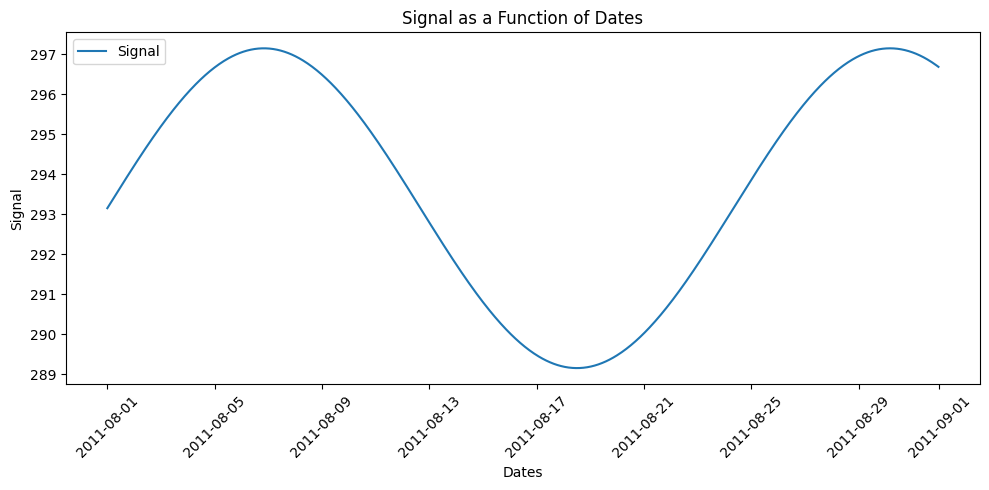

Entering T_aq generation with amplitude 0, period of 9999, offset 287.15, dt 3000.0 --> 
periodic signal



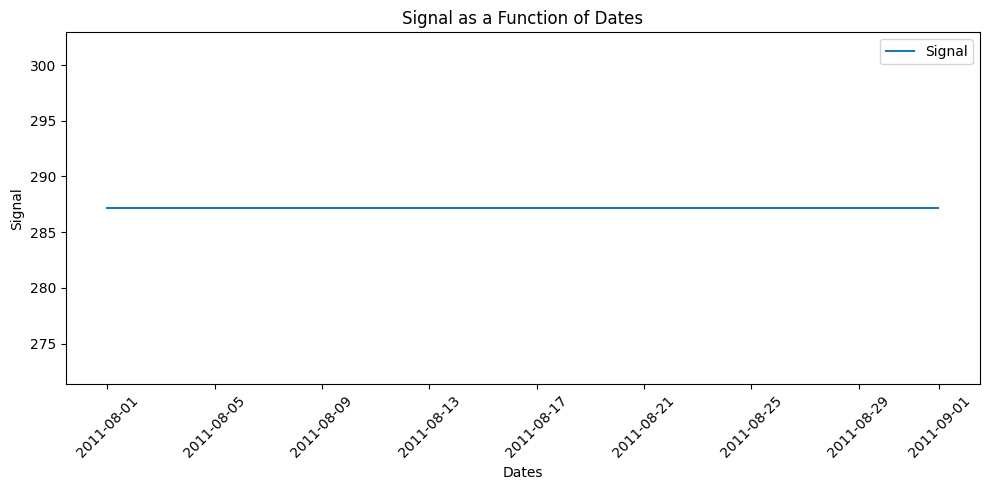

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [292.55       292.58365943 292.61731592 292.65096652 292.6846083
 292.71823831 292.75185361 292.78545127 292.81902834 292.85258189
 292.88610899 292.91960671 292.95307211 292.98650228 293.01989429
 293.05324522 293.08655216 293.11981219 293.1530224  293.1861799
 293.21928179 293.25232516 293.28530713 293.31822483 293.35107536
 293.38385587 293.41656347 293.44919532 293.48174856 293.51422035
 293.54660784 293.57890821 293.61111863 293.64323628 293.67525836
 293.70718208 293.73900462 293.77072323 293.80233511 293.83383752
 293.86522769 293.89650288 293.92766036 293.9586974  293.98961129
 294.02039932 294.05105882 294.08158709 294.11198146 294.14223928
 294.17235791 294.20233471 294.23216706 294.26185235 294.29138799
 294.3207714  294.35       294.37907124 294.40798259 294.4367315
 294.46531548 294.49373201 294.52197862 294.55005284 294.57795221
 294.60567429 294.63321667 294.66057692 294.68775267 294.7147415

In [3]:
# définition de l'expérience 

"""Times series"""
time_series_dict = {
    "offset" : 0.,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
ts = synthetic_MOLONARI.from_dict(time_series_dict)
#ts._generate_all_series(verbose=False)

"""Colonne"""
col_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": 0.,
    "dH_measures": ts._molonariP_data,
    "T_measures": ts._T_Shaft_measures,
    "sigma_meas_P": ts._sigma_P, #float
    "sigma_meas_T": ts._sigma_T, #float
}
colonne_exp = Column.from_dict(col_dict)

"""Layer"""
monolayer_dict = {
    "name": "sable",
    "zLow": depth_sensors[-1],
    "moinslog10IntrinK": moinslog10IntrinK,
    "n": n,
    "lambda_s": lambda_s,
    "rhos_cs": rho_cs
}
monolayer = Layer.from_dict(monolayer_dict)


"""Valeurs analytiques"""
analy_sol_dict = {
    "column_exp" : colonne_exp,
    "time_series" : ts,
    "monolayer" : monolayer,
    "nb_cells" : nb_cells,
}

## 2. Démonstration de la fiabilité du modèle direct avec les solutions analytiques générales
L'utilisateur expert peut réaliser d'autres test en utilisant les objets générés.

### 2.1 Calcul du RMSE

In [4]:
analy_sol_exp = Analy_Sol.from_dict(analy_sol_dict)

# MAJ des attributs de l'objet
analy_sol_exp.compute_temp_general()
analy_sol_exp.compute_temp_cond()
analy_sol_exp.generate_RMSE_analytical(ts, colonne_exp, monolayer)

NameError: name 'layersListCreator' is not defined

### 2.2 Comparaison visuelle du modèle direct et de la solution analytique

In [ ]:
t_fin =1500

for i,id_sens in enumerate(analy_sol_exp._id_sensors) :
    plt.plot(analy_sol_exp.analy_temp_general[id_sens,:t_fin],label="Tanaly{}".format(i+1))
    plt.plot(ts._T_Shaft[:t_fin,i],linestyle="--",label="Tmd{}".format(i+1))
plt.legend()
plt.grid()

### 2.3 Comparaison de la différence entre modèle direct et solution analytique en temporel

In [ ]:
for i,id_sens in enumerate(analy_sol_exp._id_sensors) :
    plt.plot(analy_sol_exp.analy_temp_general[id_sens,:]-ts._T_Shaft[:,i],label="T{}".format(i+1))
plt.legend()
plt.grid()

### 2.4 Comparaison du modèle direct et de la solution analytique en profil de température

In [ ]:
# l'utilisateur peut changer l'instant d'observation du profil
t_obs = 0

plt.plot(analy_sol_exp.analy_temp_cond[:,t_obs],-analy_sol_exp._z_solve, label='Analy')
plt.plot(colonne_exp.temperatures_solve[:,t_obs],-analy_sol_exp._z_solve, label='MD')
plt.plot(ts._T_Shaft[t_obs],-np.array(colonne_exp.depth_sensors), marker='o',label='Tshaft variable')
plt.legend()
plt.grid()
plt.title("Profils de températures à t={}".format(t_obs))
plt.xlabel("T(°C)")
plt.ylabel("z(m)")

In [ ]:
import matplotlib.animation as animation
from IPython import display

# initializing a figure
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(15.5, 25),  ylim=(-1.05,0))
axis.grid()
axis.set_title("Profils de températures à t=0")
axis.set_xlabel("T(°C)")
axis.set_ylabel("z(m)")
line1, = axis.plot(0,0, label="analytical solution")
line2, = axis.plot(0,0,ls="--", label="direct model solution")
line3, = axis.plot(0,0,'o',ls="-." , label="sensors positions")
axis.legend()
fig.suptitle('Profils de températures', fontsize=14)

line1.set_ydata(-analy_sol_exp._z_solve)
line2.set_ydata(-analy_sol_exp._z_solve)
line3.set_ydata(-np.array(colonne_exp.depth_sensors))
def animate(frame_number):
    axis.set_title("Profils de températures à t={}".format(frame_number))
    line1.set_xdata(analy_sol_exp.analy_temp_cond[:,frame_number])
    line2.set_xdata(colonne_exp.temperatures_solve[:,frame_number])
    line3.set_xdata(ts._T_Shaft[frame_number])
    return line1,line2,line3,

anim = animation.FuncAnimation(fig, animate, frames=1000, 
                               interval=200, blit=True)

# saving to m4 using ffmpeg writer
writervideo = animation.PillowWriter(fps=28)
anim.save(f'{colonne_exp._dir_print}/time_temp_profile.gif', writer=writervideo)
plt.close()

